In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [171]:
train_data=pd.read_csv(r'C:\Users\nwmo\Documents\courses\Board Infinity\Machine Learning\project 3\Train.csv')
test_data=pd.read_csv(r'C:\Users\nwmo\Documents\courses\Board Infinity\Machine Learning\project 3\Test.csv')
Submission_data=pd.read_csv(r'C:\Users\nwmo\Documents\courses\Board Infinity\Machine Learning\project 3\Submission.csv')

### Explanation of dataset

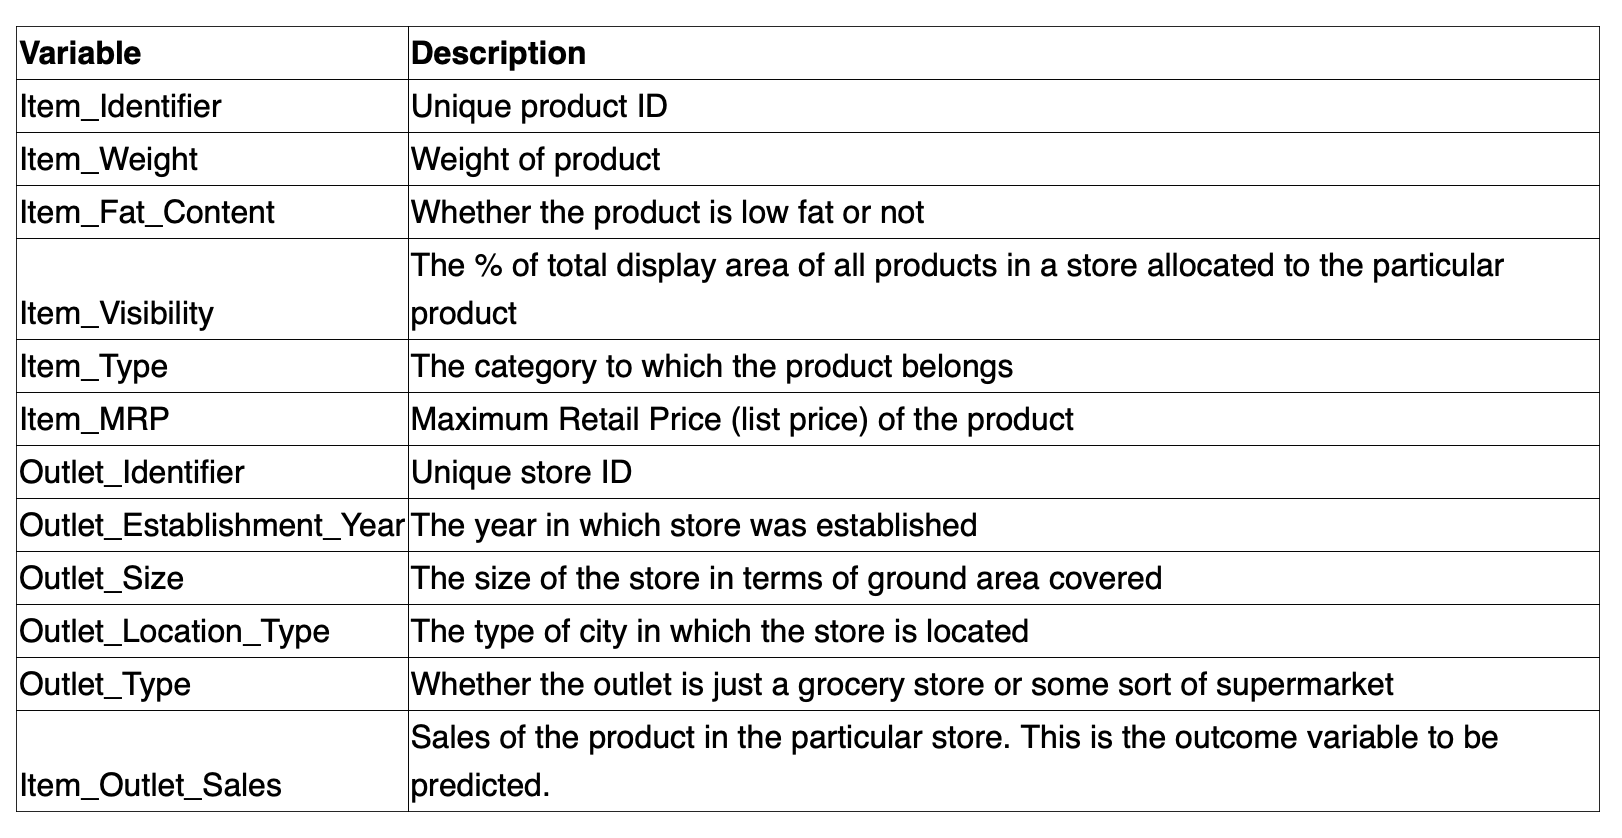

In [172]:
test_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [173]:
Submission_data.head(2)

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910


In [174]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [175]:
Submission_data= Submission_data.drop(['Unnamed: 0','Item_Identifier','Outlet_Identifier'],axis = 1)
Submission_data

,Item_Outlet_Sales
0,1636.244023
1,1409.355910
2,710.594286
3,2355.184955
4,5857.916205
...,...
5676,2125.984810
5677,2602.671833
5678,1832.451358
5679,3538.685188


In [176]:
test_data = test_data.join(Submission_data)
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1636.244023
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1409.355910
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,710.594286
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2355.184955
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5857.916205
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2125.984810
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2602.671833
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1832.451358
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3538.685188


In [177]:
df = pd.concat([train_data, test_data],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2125.984810
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2602.671833
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1832.451358
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3538.685188


## Null value treatment

In [178]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [179]:
df.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [258]:
df.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               1553
             OUT010                925
Medium       OUT027               1559
             OUT049               1550
             OUT045               1548
             OUT018               1546
             OUT017               1543
Small        OUT035               1550
             OUT046               1550
             OUT019                880
Name: Outlet_Identifier, dtype: int64

In [181]:
df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [182]:
(df.Outlet_Identifier=='OUT010').value_counts()

False    13279
True       925
Name: Outlet_Identifier, dtype: int64

### One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null


### Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [183]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [184]:
def add_outlet_size(cols):
    Outlet_Size = cols[0]
    Outlet_Identifier = cols[1]
    
    if pd.isnull(Outlet_Size):
        
        if Outlet_Identifier == 'OUT010' :
            return 'High'
        elif Outlet_Identifier == 'OUT045' :
            return 'Medium'
        elif Outlet_Identifier == 'OUT017' :
            return 'Medium'
        elif Outlet_Identifier == 'OUT013' :
            return 'High'
        elif Outlet_Identifier == 'OUT046' :
            return 'Small'
        elif Outlet_Identifier == 'OUT035' :
            return 'Small'
        elif Outlet_Identifier == 'OUT019' :
            return 'Small'
        elif Outlet_Identifier == 'OUT027' :
            return 'Medium'
        elif Outlet_Identifier == 'OUT049' :
            return 'Medium'
        elif Outlet_Identifier == 'OUT018' :
            return 'Medium'
    else:
        return Outlet_Size

In [185]:
df['Outlet_Size'] = df[['Outlet_Size','Outlet_Identifier']].apply(add_outlet_size,axis=1)
df.Outlet_Size.isna().sum()

0

In [186]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2125.984810
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2602.671833
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,1832.451358
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,3538.685188


In [187]:
df.Item_Weight.isnull().sum()

2439

In [188]:
df.Item_Weight.mean()

12.792854228644991

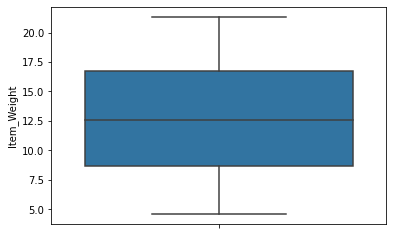

In [189]:
sns.boxplot(y='Item_Weight',data=df);

In [190]:
df.groupby('Item_Type')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,900.0,12.275211,4.744906,4.880,8.300,11.650,15.75,20.85
Breads,343.0,11.152362,4.632099,4.635,6.710,10.500,14.80,20.85
Breakfast,152.0,13.179112,5.217283,6.425,8.060,11.600,18.60,21.10
Canned,898.0,12.340830,4.625382,4.615,8.115,12.150,16.50,21.35
Dairy,941.0,13.238358,4.662724,4.805,8.930,13.300,17.50,20.70
Frozen Foods,1175.0,12.569323,4.512750,4.555,8.895,12.300,16.20,20.85
Fruits and Vegetables,1667.0,13.194406,4.567869,5.460,8.985,13.100,17.00,21.35
Hard Drinks,303.0,11.576205,4.229816,4.610,8.365,10.195,15.00,19.70
Health and Hygiene,710.0,13.171739,4.551038,5.175,9.695,12.350,17.60,21.25


### we are replacing all the null values in Item_weight column with the mean with respect to item_type as per the above observation

In [191]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [192]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [193]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793006,0.065953,141.004977,1997.830681,2179.842980
std,4.240924,0.051459,62.086938,8.371664,1553.890265
min,4.555000,0.000000,31.290000,1985.000000,-100.129007
25%,9.300000,0.027036,94.012000,1987.000000,942.772800
50%,12.800000,0.054021,142.247000,1999.000000,1892.448562
75%,16.000000,0.094037,185.855600,2004.000000,3141.987570
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Replacement of variables

In [194]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [195]:
df.Item_Fat_Content.replace(to_replace='low fat',value='Low Fat',regex=True,inplace=True)
df.Item_Fat_Content.replace(to_replace='LF',value='Low Fat',regex=True,inplace=True)
df.Item_Fat_Content.replace(to_replace='reg',value='Regular',regex=True,inplace=True)

In [196]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [197]:
df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [198]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [199]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [200]:
df.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,14204,14204,14204
unique,1559,2,16,10,3,3,4
top,FDM44,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,9185,2013,1559,7746,5583,9294


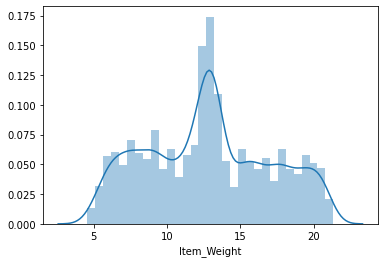

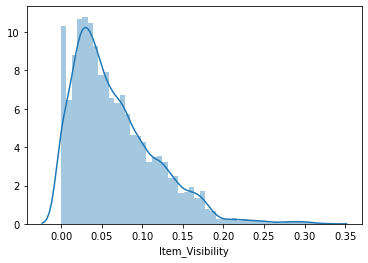

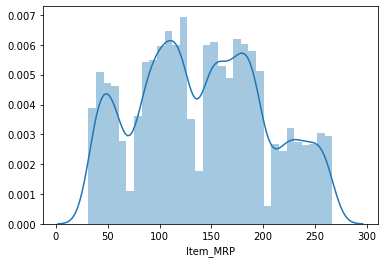

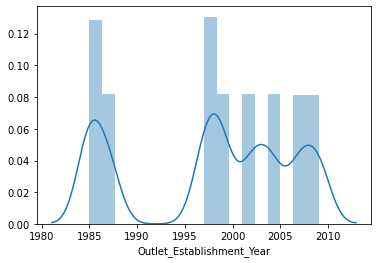

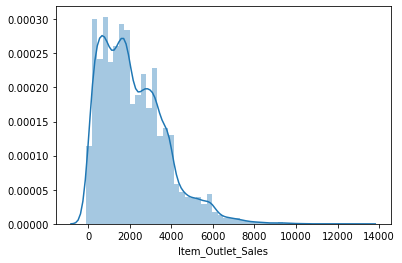

In [201]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

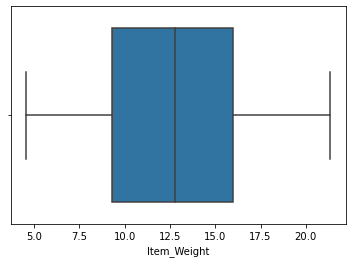

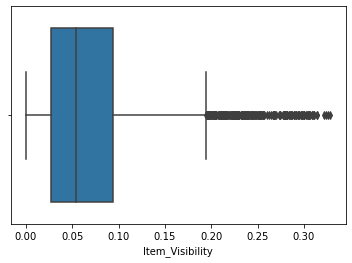

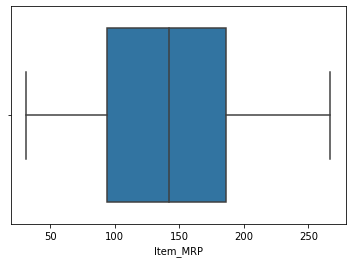

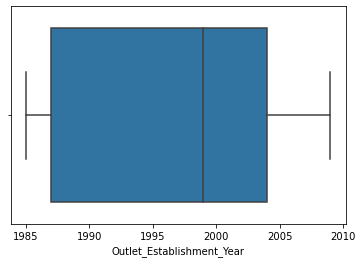

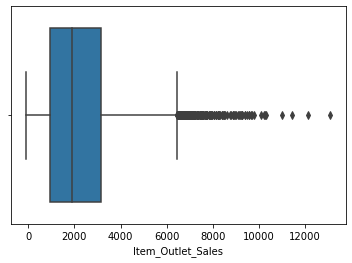

In [202]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

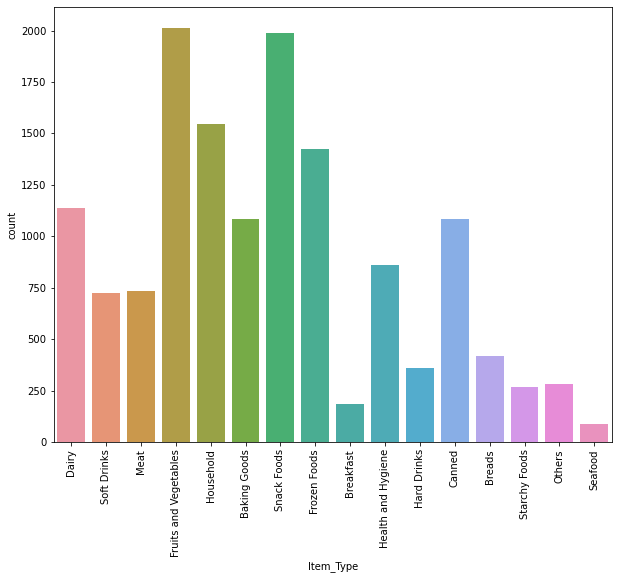

In [203]:
plt.figure(figsize=(10,8))
sns.countplot(df.Item_Type)
plt.xticks(rotation=90);

In [204]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

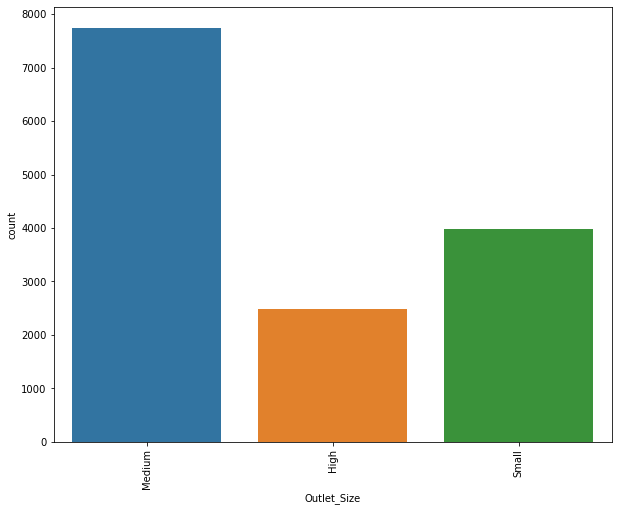

In [205]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Size)
plt.xticks(rotation=90);

In [206]:
df.Outlet_Size.value_counts()

Medium    7746
Small     3980
High      2478
Name: Outlet_Size, dtype: int64

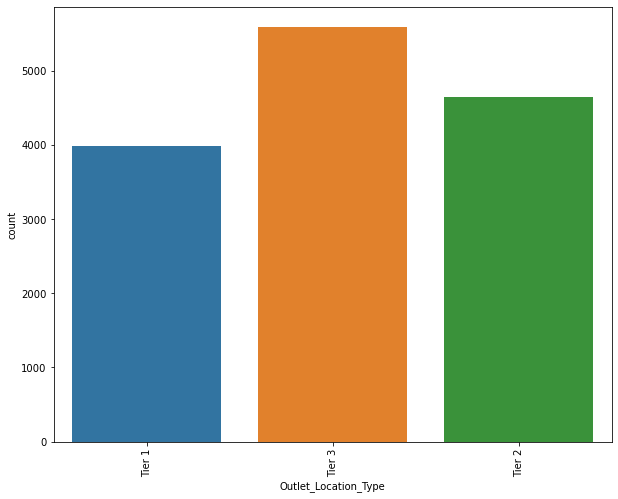

In [207]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Location_Type)
plt.xticks(rotation=90);

In [208]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

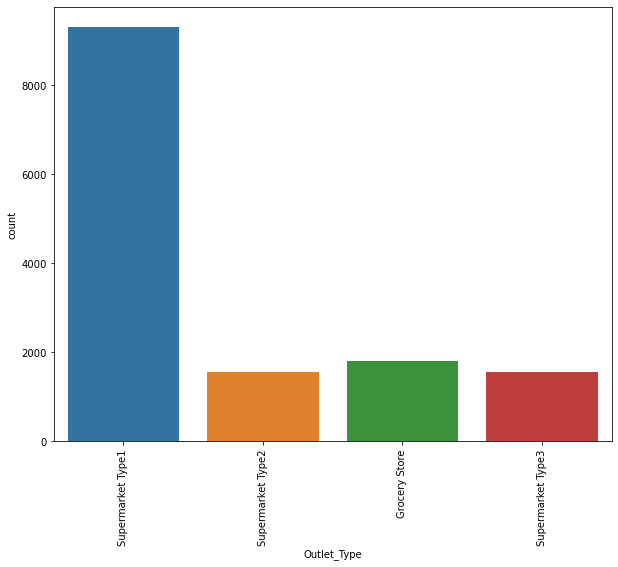

In [209]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90);

In [210]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

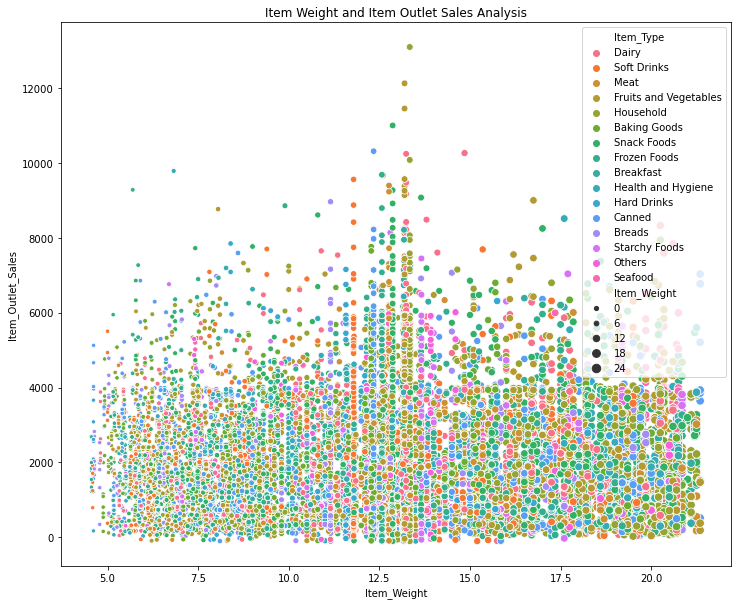

In [211]:
plt.figure(figsize=(12,10))
plt.title('Item Weight and Item Outlet Sales Analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df);

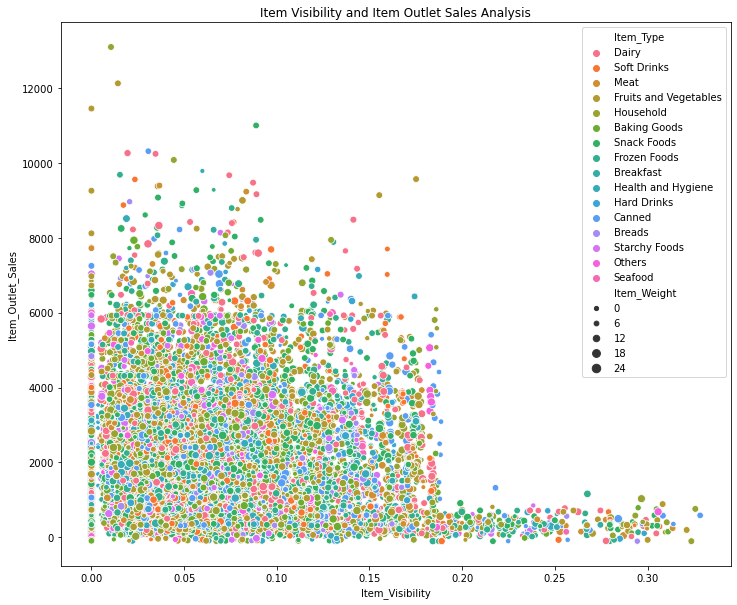

In [212]:
plt.figure(figsize=(12,10))
plt.title('Item Visibility and Item Outlet Sales Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df);

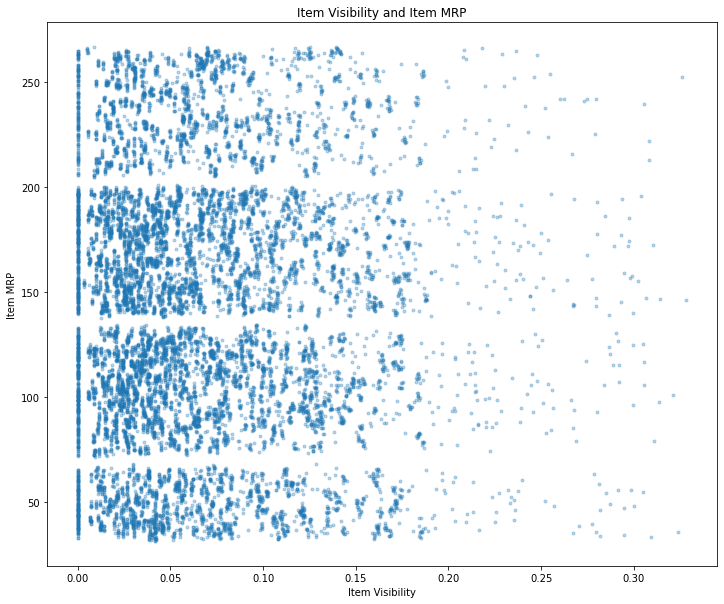

In [213]:
plt.figure(figsize=(12,10))
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')
plt.title('Item Visibility and Item MRP')
plt.plot(df['Item_Visibility'],df['Item_MRP'],'.',alpha=0.3);

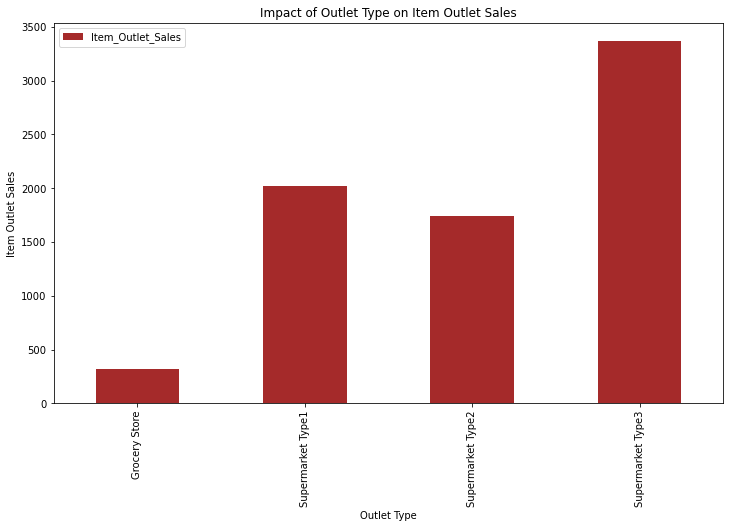

In [214]:
Outlet_Type_pivot = \
df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Outlet Type on Item Outlet Sales')
plt.show();

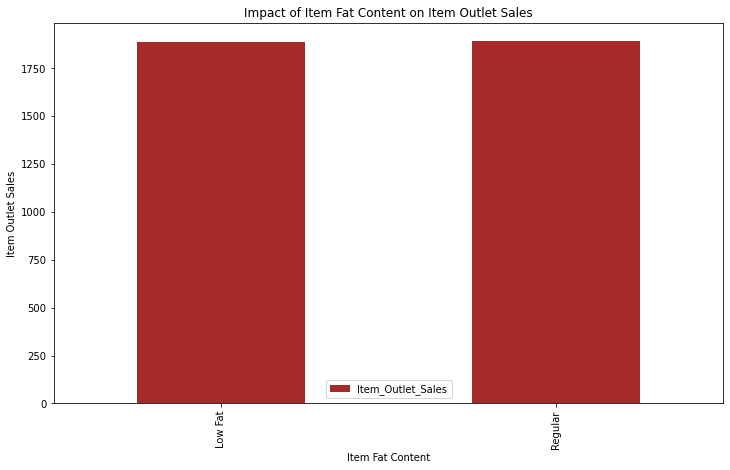

In [215]:
Outlet_Type_pivot = \
df.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Item Fat Content on Item Outlet Sales')
plt.show();

In [216]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013821,0.033936,0.000407,0.020237
Item_Visibility,-0.013821,1.000000,-0.006351,-0.083678,-0.135498
Item_MRP,0.033936,-0.006351,1.000000,0.000141,0.614418
Outlet_Establishment_Year,0.000407,-0.083678,0.000141,1.000000,-0.055254
Item_Outlet_Sales,0.020237,-0.135498,0.614418,-0.055254,1.000000


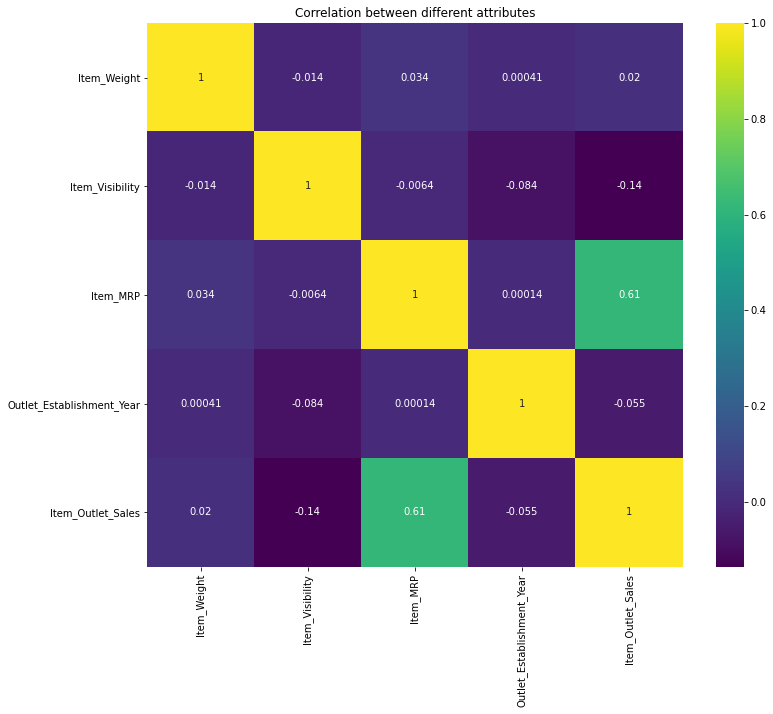

In [217]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

### Item Visibility Treatment

In [218]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

- Here we can see that Item Visibility is having items with '0' visibility which can be assumed that the product is not available. so we have to replace it with median to generalize it and give it, it's actual visibility score and here we are choosing 'Median' because the distribution of item visibility is right sckewed and in this case mean is not a ideal option.

In [219]:
df['Item_Visibility'].replace({0:df.Item_Visibility.median()},inplace=True)

In [220]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

0

In [221]:
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [222]:
df['Outlet_Years'] = 2010 - df['Outlet_Establishment_Year']
df.Outlet_Years.describe()

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

In [223]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [224]:
df['Item_Identifier'].value_counts()

FDM44    10
FDC32    10
FDT04    10
NCM18    10
FDB23    10
         ..
FDS22     7
FDH58     7
NCW54     7
FDI46     7
FDR51     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [225]:
df['Item_Identifier'].apply(lambda x: x[0:3]).value_counts()

FDT    467
FDW    460
FDX    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRY      9
DRQ      9
Name: Item_Identifier, Length: 71, dtype: int64

In [226]:
df['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [227]:
# Making a column with first 2 characters (i.e., Category ID)
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [228]:
df.New_Item_Type.value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Type, dtype: int64

#### So here the basic catogeries are FD - Food, DR - Drinks, NC - Non consumables

- Here we have added new column by nane New_Item_Type in order to reduce the no.of Item_Identifier unique values as they are 1559 unique values and if we continue with building model with such huge number of unique values we might end up facing curse of dimentionality 

In [229]:
df[['New_Item_Type','Item_Fat_Content']]

,New_Item_Type,Item_Fat_Content
0,FD,Low Fat
1,DR,Regular
2,FD,Low Fat
3,FD,Regular
4,NC,Low Fat
...,...,...
14199,FD,Regular
14200,FD,Regular
14201,NC,Low Fat
14202,FD,Regular


In [230]:
# In Item_Fat_Content even NC - Non Consumable goods are marked as low fat as we can observe above. 
# We have to change it to Non-Edible
df.loc[df['New_Item_Type'] == 'NC','Item_Fat_Content'] = 'Non-Edible'
df.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [231]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000,11,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800,1,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000,11,FD
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.380000,12,FD
4,NCD19,8.93,Non-Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,23,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2125.984810,13,FD
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2602.671833,1,FD
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,1832.451358,8,NC
14202,FDJ26,15.30,Regular,0.054021,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,3538.685188,3,FD


### Pre- Processing data for Model

- dealing with Catogeriacal columns using Lable encoding

In [232]:
train_test = df.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)
train_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138000,11,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.422800,1,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.270000,11,FD
3,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,High,Tier 3,Grocery Store,732.380000,12,FD
4,8.93,Non-Edible,0.054021,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.705200,23,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,2125.984810,13,FD
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,2602.671833,1,FD
14201,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1,1832.451358,8,NC
14202,15.30,Regular,0.054021,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1,3538.685188,3,FD


In [233]:
cat_col = train_test.describe(include=object).columns

train_test = pd.get_dummies(train_test,columns = cat_col)

In [234]:
train_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_DR,New_Item_Type_FD,New_Item_Type_NC
0,9.30,0.016047,249.8092,3735.138000,11,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.422800,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.270000,11,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.054021,182.0950,732.380000,12,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.054021,53.8614,994.705200,23,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,2125.984810,13,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
14200,7.60,0.142991,169.1448,2602.671833,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
14201,10.00,0.073529,118.7440,1832.451358,8,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
14202,15.30,0.054021,214.6218,3538.685188,3,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [235]:
# To divide the data into attributes and labels, do

X = train_test.drop('Item_Outlet_Sales',axis = 1)
y = train_test['Item_Outlet_Sales']

# the final preprocessing step is to divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

### Building Model

### Linear Regression

In [242]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [243]:
y_pred = lr.predict(X_test)

In [260]:
lr.score(X_train,y_train)

0.6624668428904095

In [244]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 584.7004495437102
Mean Squared Error: 780725.9468944995
Root Mean Squared Error: 883.5869775491825


In [247]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 769.7592994268093
Mean Squared Error: 1501155.6084029402
Root Mean Squared Error: 1225.216555716964


In [259]:
dt_model.score(X_train,y_train)

1.0

In [252]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 543.5824119945054
Mean Squared Error: 761036.3172508832
Root Mean Squared Error: 872.3739549361176


In [253]:
rf_model.score(X_train,y_train)

0.9543175094104341

In [255]:
rf_model.score(X_test,y_test)

0.6845486235222947